# Retail Buyer Segmentation

## Importing data & data exploration

In [156]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
# Set random seeds for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Display settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

df = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 20000)
df.head(5)

,customer_id,birth_year,education_level,marital_status,annual_income,num_children,num_teenagers,signup_date,days_since_last_purchase,has_recent_complaint,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_campaign_1,accepted_campaign_2,accepted_campaign_3,accepted_campaign_4,accepted_campaign_5,accepted_last_campaign
0,5524,1957,Graduation,Single,58138.0,0,0.0,4/9/2012,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1.0,8/3/2014,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0.0,21-08-2013,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0.0,10/2/2014,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0.0,19-01-2014,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0


In [122]:
# Comprehensive data quality report
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum()[df.isnull().sum() > 0])
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nUnique Values per Column:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique | {df[col].value_counts().head(3).to_dict()}")

Dataset Shape: (2240, 27)

Data Types:
 customer_id                   int64
birth_year                    int64
education_level              object
marital_status               object
annual_income               float64
num_children                  int64
num_teenagers               float64
signup_date                  object
days_since_last_purchase      int64
has_recent_complaint          int64
spend_wine                    int64
spend_fruits                  int64
spend_meat                    int64
spend_fish                    int64
spend_sweets                  int64
spend_gold                    int64
num_discount_purchases        int64
num_web_purchases             int64
num_catalog_purchases         int64
num_store_purchases           int64
web_visits_last_month         int64
accepted_campaign_1           int64
accepted_campaign_2           int64
accepted_campaign_3           int64
accepted_campaign_4           int64
accepted_campaign_5           int64
accepted_last_campaign  

## Data Cleaning

In [123]:
df.isna().sum()

customer_id                  0
birth_year                   0
education_level             41
marital_status               0
annual_income               67
num_children                 0
num_teenagers               44
signup_date                  0
days_since_last_purchase     0
has_recent_complaint         0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
accepted_campaign_1          0
accepted_campaign_2          0
accepted_campaign_3          0
accepted_campaign_4          0
accepted_campaign_5          0
accepted_last_campaign       0
dtype: int64

### Filling educatin_level with 'Unknown' 

In [124]:
print("Before:", df["education_level"].value_counts())
# education_level: Create 'Unknown' category (already meaningful in data)
df['education_level'] = df['education_level'].fillna('Unknown')
print("\nAfter: ", df["education_level"].value_counts())

Before: education_level
Graduation    1105
PhD            474
Master         365
2n Cycle       201
Basic           54
Name: count, dtype: int64

After:  education_level
Graduation    1105
PhD            474
Master         365
2n Cycle       201
Basic           54
Unknown         41
Name: count, dtype: int64


In [125]:
# marital_status: Group rare categories for statistical power
print('Before', df['marital_status'].value_counts())

rare_status = ['Alone', 'Absurd', 'YOLO']
df['marital_status_clean'] = df['marital_status'].apply(
    lambda x: 'Other' if x in rare_status else x
)
df['marital_status'] = df['marital_status_clean']

print('\nAfter', df['marital_status'].value_counts())

Before marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

After marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Other         7
Name: count, dtype: int64


In [126]:
df.isnull().sum()

customer_id                  0
birth_year                   0
education_level              0
marital_status               0
annual_income               67
num_children                 0
num_teenagers               44
signup_date                  0
days_since_last_purchase     0
has_recent_complaint         0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
accepted_campaign_1          0
accepted_campaign_2          0
accepted_campaign_3          0
accepted_campaign_4          0
accepted_campaign_5          0
accepted_last_campaign       0
marital_status_clean         0
dtype: int64

### Filling annual_income with median


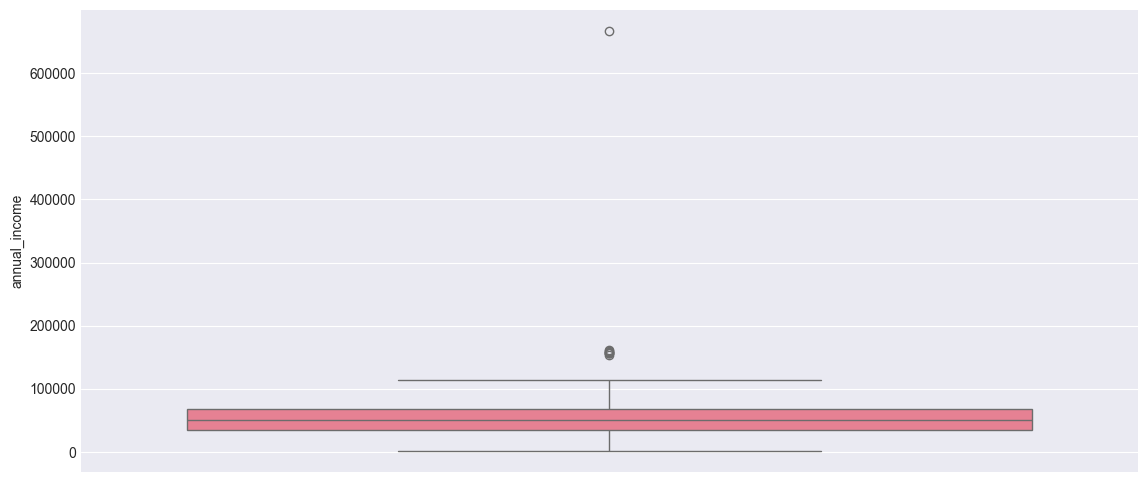

In [127]:
#outlier then median
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
sns.boxplot(df["annual_income"])

# annual_income: Median imputation by education level (income correlates with education)
df['annual_income'] = df.groupby('education_level')['annual_income'].transform(
    lambda x: x.fillna(x.median())
)

In [128]:
df.isna().sum()

customer_id                  0
birth_year                   0
education_level              0
marital_status               0
annual_income                0
num_children                 0
num_teenagers               44
signup_date                  0
days_since_last_purchase     0
has_recent_complaint         0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
accepted_campaign_1          0
accepted_campaign_2          0
accepted_campaign_3          0
accepted_campaign_4          0
accepted_campaign_5          0
accepted_last_campaign       0
marital_status_clean         0
dtype: int64

### Filling num_teenagers with zeros


In [129]:
# num_teenagers: fill with 0
df['num_teenagers'] = df['num_teenagers'].fillna(0)

In [130]:
df.isna().sum()

customer_id                 0
birth_year                  0
education_level             0
marital_status              0
annual_income               0
num_children                0
num_teenagers               0
signup_date                 0
days_since_last_purchase    0
has_recent_complaint        0
spend_wine                  0
spend_fruits                0
spend_meat                  0
spend_fish                  0
spend_sweets                0
spend_gold                  0
num_discount_purchases      0
num_web_purchases           0
num_catalog_purchases       0
num_store_purchases         0
web_visits_last_month       0
accepted_campaign_1         0
accepted_campaign_2         0
accepted_campaign_3         0
accepted_campaign_4         0
accepted_campaign_5         0
accepted_last_campaign      0
marital_status_clean        0
dtype: int64

## Handling outliers

### annual_income outliers

<Axes: ylabel='annual_income'>

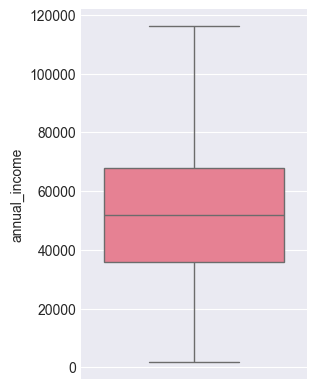

In [131]:
Q1=df.describe()["annual_income"]["25%"]
Q3=df.describe()["annual_income"]["75%"]
IQR=Q3 - Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df["annual_income"]=df["annual_income"].clip(lower_limit,upper_limit)
plt.subplot(1,2,1)
sns.boxplot(df["annual_income"])

## Encoding Categorical Features

In [132]:
# Encoding nominal(no order) and ordinal(order)
# Educational level is ordinal order: (Unknown, Basic ,2n Cycle, Bachelor, Master, PhD)
# Marital Status is nominal(no order):(Single,Married,Divorced,Other)
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
od_education = OrdinalEncoder(categories=[['Unknown', 'Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']])
df['education_encoded'] = od_education.fit_transform(df[['education_level']])
ohe_marital = OneHotEncoder(sparse_output=False)
marital_encoded = ohe_marital.fit_transform(df[['marital_status']])
marital_encoded_df = pd.DataFrame(marital_encoded, columns=ohe_marital.get_feature_names_out(['marital_status']))
df = pd.concat([df, marital_encoded_df], axis=1)

# Save encoders for later interpretation
encoders = {
    'education': od_education,
    'marital_status': ohe_marital
}
df[['education_encoded'] + list(marital_encoded_df.columns)]
df.head(5)

,customer_id,birth_year,education_level,marital_status,annual_income,num_children,num_teenagers,signup_date,days_since_last_purchase,has_recent_complaint,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_campaign_1,accepted_campaign_2,accepted_campaign_3,accepted_campaign_4,accepted_campaign_5,accepted_last_campaign,marital_status_clean,education_encoded,marital_status_Divorced,marital_status_Married,marital_status_Other,marital_status_Single,marital_status_Together,marital_status_Widow
0,5524,1957,Graduation,Single,58138.0,0,0.0,4/9/2012,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,Single,3.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2174,1954,Graduation,Single,46344.0,1,1.0,8/3/2014,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,Single,3.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4141,1965,Graduation,Together,71613.0,0,0.0,21-08-2013,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,Together,3.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6182,1984,Graduation,Together,26646.0,1,0.0,10/2/2014,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,Together,3.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5324,1981,PhD,Married,58293.0,1,0.0,19-01-2014,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,Married,5.0,0.0,1.0,0.0,0.0,0.0,0.0


## Feature Engineering

### Deriving useful features (16)

In [133]:
# Create time-based features
from datetime import datetime

new_cols = []
current_year = 2014  # Based on signup_date range in data
df['customer_age'] = current_year - df['birth_year']
new_cols.append('customer_age')

# Parse signup_date handling mixed formats
df['signup_date_parsed'] = pd.to_datetime(df['signup_date'], format='mixed', dayfirst=False)
df['customer_tenure_days'] = (pd.to_datetime('2014-12-31') - df['signup_date_parsed']).dt.days
new_cols.extend(['customer_tenure_days', 'signup_date_parsed'])

# Spending aggregations
spending_cols = ['spend_wine', 'spend_fruits', 'spend_meat', 'spend_fish', 'spend_sweets', 'spend_gold']
df['total_spend'] = df[spending_cols].sum(axis=1)
df['avg_spend_per_category'] = df[spending_cols].mean(axis=1)
df['spend_wine_ratio'] = df['spend_wine'] / (df['total_spend'] + 1)  # Safety to Avoid division by zero
df['spend_meat_ratio'] = df['spend_meat'] / (df['total_spend'] + 1)
new_cols.extend(['total_spend', 'avg_spend_per_category', 'spend_wine_ratio', 'spend_meat_ratio'])

# Channel preferences
channel_cols = ['num_web_purchases', 'num_catalog_purchases', 'num_store_purchases']
df['total_purchases'] = df[channel_cols].sum(axis=1)
df['web_purchase_ratio'] = df['num_web_purchases'] / (df['total_purchases'] + 1)
df['store_purchase_ratio'] = df['num_store_purchases'] / (df['total_purchases'] + 1)
new_cols.extend(['total_purchases', 'web_purchase_ratio', 'store_purchase_ratio'])

# Campaign engagement
campaign_cols = [col for col in df.columns if 'campaign' in col.lower()]
df['total_campaigns_accepted'] = df[campaign_cols].sum(axis=1)
df['campaign_acceptance_rate'] = df['total_campaigns_accepted'] / len(campaign_cols)
new_cols.extend(['total_campaigns_accepted', 'campaign_acceptance_rate'])

# Family composition
df['family_size'] = df['num_children'] + df['num_teenagers'].fillna(0)
df['has_dependents'] = (df['family_size'] > 0).astype(int)
new_cols.extend(['family_size', 'has_dependents'])


print(df[new_cols].info())
print(df[new_cols].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_age              2240 non-null   int64         
 1   customer_tenure_days      2240 non-null   int64         
 2   signup_date_parsed        2240 non-null   datetime64[ns]
 3   total_spend               2240 non-null   int64         
 4   avg_spend_per_category    2240 non-null   float64       
 5   spend_wine_ratio          2240 non-null   float64       
 6   spend_meat_ratio          2240 non-null   float64       
 7   total_purchases           2240 non-null   int64         
 8   web_purchase_ratio        2240 non-null   float64       
 9   store_purchase_ratio      2240 non-null   float64       
 10  total_campaigns_accepted  2240 non-null   int64         
 11  campaign_acceptance_rate  2240 non-null   float64       
 12  family_size         

In [134]:
print(df.describe().T)
print(df.info())

                           count                           mean  \
customer_id               2240.0                    5592.159821   
birth_year                2240.0                    1968.805804   
annual_income             2240.0                   51851.350893   
num_children              2240.0                       0.444196   
num_teenagers             2240.0                       0.496429   
days_since_last_purchase  2240.0                      49.109375   
has_recent_complaint      2240.0                       0.009375   
spend_wine                2240.0                     303.935714   
spend_fruits              2240.0                      26.302232   
spend_meat                2240.0                         166.95   
spend_fish                2240.0                      37.525446   
spend_sweets              2240.0                      27.062946   
spend_gold                2240.0                      44.021875   
num_discount_purchases    2240.0                          2.32

### Dropping useless features

In [135]:
drop_cols = [
    'customer_id',
    'signup_date', 'signup_date_parsed',
    'marital_status', 'marital_status_clean', 'education_level'
]

df_modeled = df.drop(drop_cols, axis=1)
df_modeled.columns

Index(['birth_year', 'annual_income', 'num_children', 'num_teenagers',
       'days_since_last_purchase', 'has_recent_complaint', 'spend_wine',
       'spend_fruits', 'spend_meat', 'spend_fish', 'spend_sweets',
       'spend_gold', 'num_discount_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'web_visits_last_month',
       'accepted_campaign_1', 'accepted_campaign_2', 'accepted_campaign_3',
       'accepted_campaign_4', 'accepted_campaign_5', 'accepted_last_campaign',
       'education_encoded', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Other',
       'marital_status_Single', 'marital_status_Together',
       'marital_status_Widow', 'customer_age', 'customer_tenure_days',
       'total_spend', 'avg_spend_per_category', 'spend_wine_ratio',
       'spend_meat_ratio', 'total_purchases', 'web_purchase_ratio',
       'store_purchase_ratio', 'total_campaigns_accepted',
       'campaign_acceptance_rate', 'family_size',

### Scaling to prepare for Kmeans

In [136]:
from sklearn.preprocessing import StandardScaler


numeric_cols = df_modeled.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_modeled[numeric_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols, index=df_modeled.index)
X_scaled_df.head()
df_modeled_scaled = df_modeled.copy()
df_modeled_scaled.update(X_scaled_df)
df_modeled_scaled.head()

C:\Users\Esraa\AppData\Local\Temp\ipykernel_22376\3136410099.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.98534473 -1.23573295 -0.3176428  ...  1.01776106 -1.06880747
 -1.23573295]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_modeled_scaled.update(X_scaled_df)
C:\Users\Esraa\AppData\Local\Temp\ipykernel_22376\3136410099.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.82521765  1.03255877 -0.82521765 ... -0.82521765 -0.82521765
  1.03255877]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_modeled_scaled.update(X_scaled_df)
C:\Users\Esraa\AppData\Local\Temp\ipykernel_22376\3136410099.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.30703926 -0.38366418 -0.

,birth_year,annual_income,num_children,num_teenagers,days_since_last_purchase,has_recent_complaint,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_campaign_1,accepted_campaign_2,accepted_campaign_3,accepted_campaign_4,accepted_campaign_5,accepted_last_campaign,education_encoded,marital_status_Divorced,marital_status_Married,marital_status_Other,marital_status_Single,marital_status_Together,marital_status_Widow,customer_age,customer_tenure_days,total_spend,avg_spend_per_category,spend_wine_ratio,spend_meat_ratio,total_purchases,web_purchase_ratio,store_purchase_ratio,total_campaigns_accepted,campaign_acceptance_rate,family_size,has_dependents
0,-0.985345,0.302716,-0.825218,-0.914573,0.307039,-0.097282,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.262111,-0.11651,-0.28014,-0.28383,-0.28014,2.388846,-0.358204,-0.339909,-0.792406,-0.055989,1.914854,-0.591099,-0.188676,0.985345,1.976745,1.679417,1.679417,-0.273409,0.720624,1.313544,0.468215,-2.359145,0.621248,0.621248,-1.256611,-1.569119
1,-1.235733,-0.265191,1.032559,0.927732,-0.383664,-0.097282,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.262111,-0.11651,-0.28014,-0.28383,-0.28014,-0.418612,-0.358204,-0.339909,-0.792406,-0.055989,1.914854,-0.591099,-0.188676,1.235733,-1.667011,-0.961275,-0.961275,-0.271660,-0.260135,-1.185022,-0.847942,-0.395160,-0.501912,-0.501912,1.415253,0.637300
2,-0.317643,0.951566,-0.825218,-0.914573,-0.798086,-0.097282,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.262111,-0.11651,-0.28014,-0.28383,-0.28014,-0.418612,-0.358204,-0.339909,-0.792406,-0.055989,-0.522233,1.691765,-0.188676,0.317643,-0.172468,0.282673,0.282673,0.412449,-0.664935,1.035926,0.763152,0.266696,-0.501912,-0.501912,-1.256611,-1.569119
3,1.268149,-1.213692,1.032559,-0.914573,-0.798086,-0.097282,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.262111,-0.11651,-0.28014,-0.28383,-0.28014,-0.418612,-0.358204,-0.339909,-0.792406,-0.055989,-0.522233,1.691765,-0.188676,-1.268149,-1.925433,-0.918094,-0.918094,-1.104331,0.982732,-0.907403,-0.084792,1.094016,-0.501912,-0.501912,0.079321,0.637300
4,1.017761,0.310179,1.032559,-0.914573,1.550305,-0.097282,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.262111,-0.11651,-0.28014,-0.28383,-0.28014,-0.418612,1.463308,-0.339909,1.261980,-0.055989,-0.522233,-0.591099,-0.188676,-1.017761,-0.822831,-0.305254,-0.305254,-0.200671,0.254851,0.203070,0.339180,-0.395160,-0.501912,-0.501912,0.079321,0.637300


## Clustering to find customer segments

### Kmeans

K=2, Silhouette Score=0.2129
K=3, Silhouette Score=0.1504
K=4, Silhouette Score=0.1517
K=5, Silhouette Score=0.0939
K=6, Silhouette Score=0.0967
K=7, Silhouette Score=0.0886
K=8, Silhouette Score=0.0909
K=9, Silhouette Score=0.0819
K=10, Silhouette Score=0.0945
K=11, Silhouette Score=0.0751
K=12, Silhouette Score=0.0887
K=13, Silhouette Score=0.092
K=14, Silhouette Score=0.0851


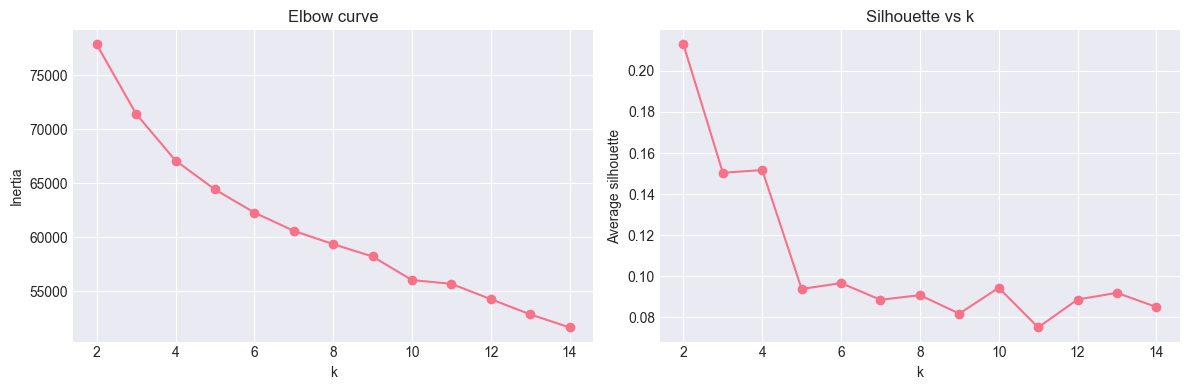

In [137]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K_values = range(2, 15)   # tests 2,3,4,5,6,7,8

silhouette_scores = []
inertias = []

for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42,n_init=10)
    labels = kmeans.fit_predict(df_modeled_scaled)
    score = silhouette_score(df_modeled_scaled,labels)
    silhouette_scores.append(score)
    inertias.append(kmeans.inertia_)  # sum of squared distances to centroids
    print(f"K={K}, Silhouette Score={round(score, 4)}")


fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(K_values, inertias, "o-")
ax[0].set_xlabel("k"); ax[0].set_ylabel("Inertia")
ax[0].set_title("Elbow curve")

ax[1].plot(K_values, silhouette_scores, "o-")
ax[1].set_xlabel("k"); ax[1].set_ylabel("Average silhouette")
ax[1].set_title("Silhouette vs k")
plt.tight_layout()
plt.show()

### Hirarichal Clustering
#### Roughly 4 clusters

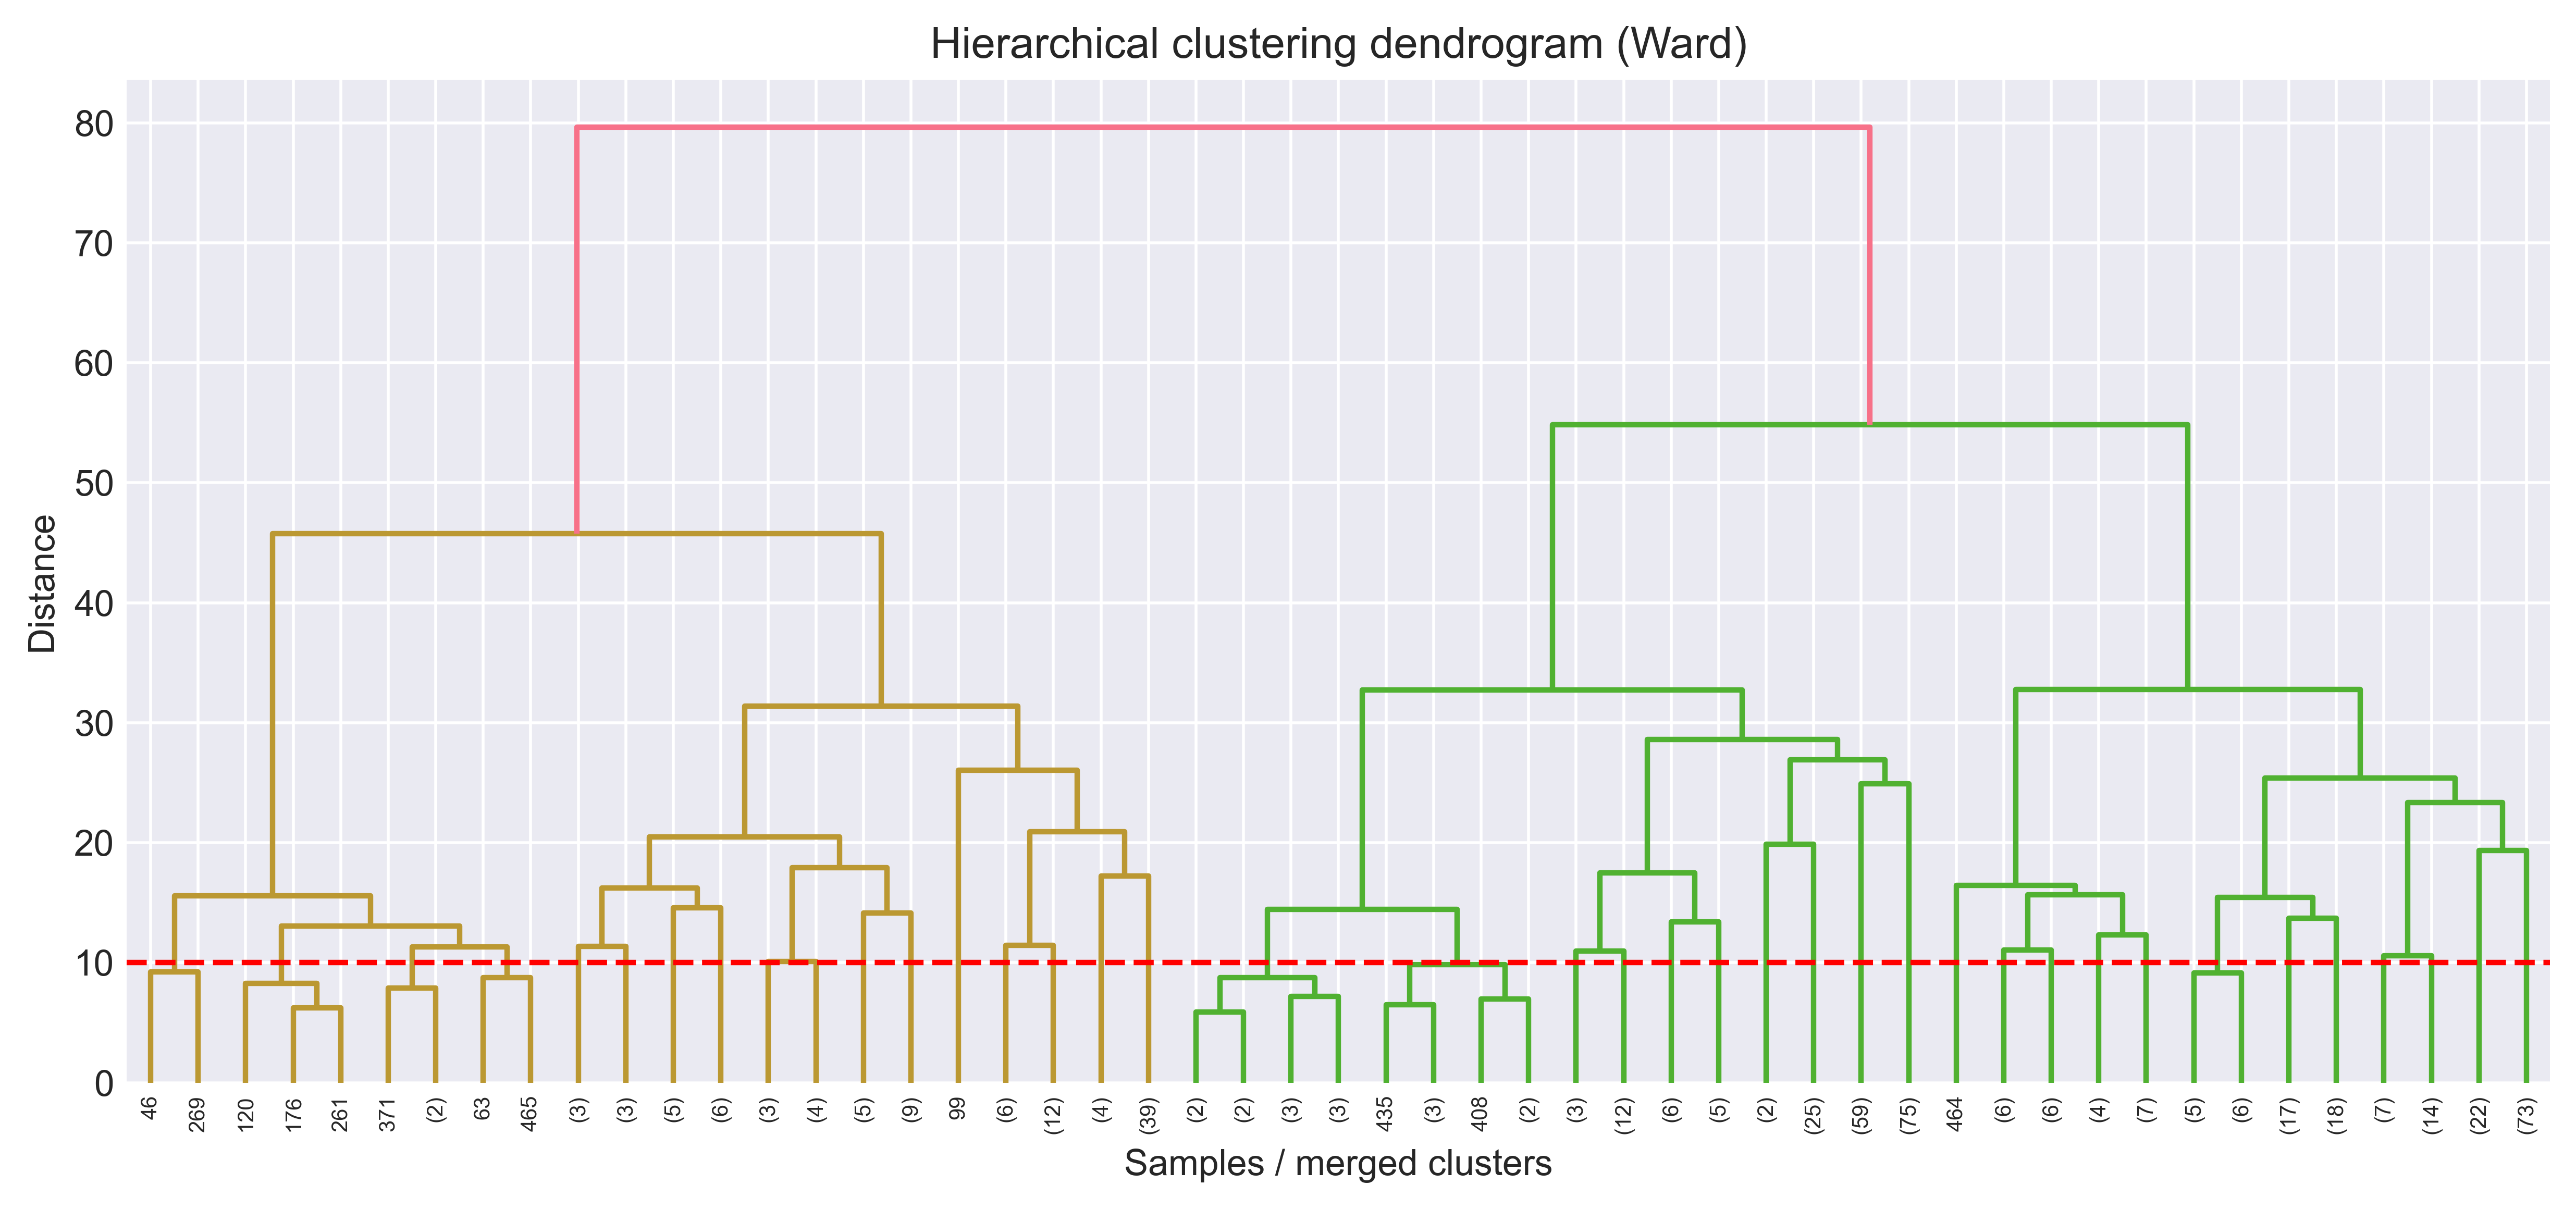

In [138]:
from scipy.cluster.hierarchy import linkage, dendrogram

# For the dendrogram, sample to keep it readable
sample = df_modeled_scaled.sample(n=min(500, len(df_modeled_scaled)), random_state=42)
Z = linkage(sample, method="ward")  # Ward minimizes within-cluster variance

plt.figure(figsize=(12, 5), dpi=500)
dendrogram(Z, truncate_mode="level", p=5)
plt.axhline(y=10, color="r", linestyle="--")
plt.title("Hierarchical clustering dendrogram (Ward)")
plt.xlabel("Samples / merged clusters")
plt.ylabel("Distance")
plt.show()

### DBSCAN
#### this shows that a choice of 4 clusters is reasonable

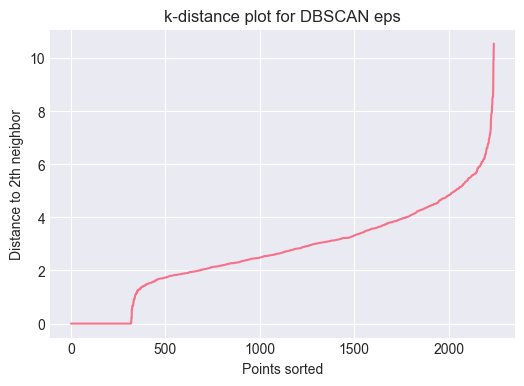

eps=1.5: clusters=0, noise=0
eps=2.0: clusters=4, noise=0
eps=2.5: clusters=6, noise=0
eps=3.0: clusters=6, noise=0


In [139]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# 1. k-distance plot to choose eps (e.g., k=2)
k = 2
nbrs = NearestNeighbors(n_neighbors=k).fit(df_modeled_scaled)
distances, _ = nbrs.kneighbors(df_modeled_scaled)
k_dist = np.sort(distances[:, -1])

plt.figure(figsize=(6, 4))
plt.plot(k_dist)
plt.xlabel("Points sorted"); plt.ylabel(f"Distance to {k}th neighbor")
plt.title("k-distance plot for DBSCAN eps")
plt.show()

for eps in [1.5, 2.0, 2.5, 3.0]:
    db = DBSCAN(eps=eps, min_samples=10).fit(df_modeled_scaled)
    db_labels = db.labels_
    n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    n_noise = list(labels).count(-1)
    print(f"eps={eps}: clusters={n_clusters}, noise={n_noise}")

df_db = df_modeled.copy()
df_db["cluster"] = db_labels

### Conclusion 
### K=2 gave the highest silhouette, but was too coarse for meaningful segments; both K‑means and DBSCAN indicated ~4 natural groups, so K=4 was selected as the primary segmentation for interpretation and classification.

## Cleaning up clusters

In [140]:
best_k = 4  # Based on silhouette scores and dendrogram analysis
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = final_kmeans.fit_predict(df_modeled_scaled)
kmeans_centers = kmeans.cluster_centers_
sil_kmeans = silhouette_score(df_modeled_scaled, kmeans_labels)

df_kmeans = df_modeled.copy()
df_kmeans['cluster'] = kmeans_labels
print(df_kmeans['cluster'].value_counts())

cluster
0    1072
1     664
3     497
2       7
Name: count, dtype: int64


#### Cluster 2 seem to be only 7 customers, further investigation reveal that they are the 7 customers whose marital status is 'Other'

In [141]:
df_kmeans.filter(regex='^marital_status')[df_kmeans['cluster'] == 2]

,marital_status_Divorced,marital_status_Married,marital_status_Other,marital_status_Single,marital_status_Together,marital_status_Widow
131,0.0,0.0,1.0,0.0,0.0,0.0
138,0.0,0.0,1.0,0.0,0.0,0.0
153,0.0,0.0,1.0,0.0,0.0,0.0
2093,0.0,0.0,1.0,0.0,0.0,0.0
2134,0.0,0.0,1.0,0.0,0.0,0.0
2177,0.0,0.0,1.0,0.0,0.0,0.0
2202,0.0,0.0,1.0,0.0,0.0,0.0


### Since cluster 2 would make classification inaccurate merging it with the closest cluster (0, 1, 3) is the best option

In [142]:
from sklearn.metrics import pairwise_distances
import numpy as np

# Get centroids and labels
centers = final_kmeans.cluster_centers_  # shape (4, n_features)
labels = kmeans_labels.copy()
X_scaled = df_modeled_scaled.values

# Find indices of the 7 customers in cluster 2
small_idx = np.where(labels == 2)[0]

# Compute distances from these 7 points to all 4 centroids
dists = pairwise_distances(X_scaled[small_idx], centers, metric="euclidean")

# For each of the 7 points, reassign to nearest cluster (excluding cluster 2 itself)
allowed_clusters = [0, 1, 3]
for i, row_idx in enumerate(small_idx):
    best_cluster = allowed_clusters[np.argmin(dists[i, allowed_clusters])]
    labels[row_idx] = best_cluster

# Create final merged dataframe
df_final = df_modeled.copy()
df_final["cluster"] = labels

print("After merging:")
print(df_final["cluster"].value_counts())


After merging:
cluster
0    1074
1     667
3     499
Name: count, dtype: int64


## Clusters Summaries

In [143]:
# number of data in each cluster
cluster_counts = df_final['cluster'].value_counts().sort_index()
print("Cluster sizes:\n", cluster_counts)

# bnhaded kol cluster el nas fih eh bnsba ll average fa el negative below average w positive above average ex: in annual income in cluster 0->negative so below average(low income )      in cluster 1->positive so above average(high income)
cluster_means = df_final.groupby('cluster').mean(numeric_only=True).T
print("\nCluster means (transposed):\n", cluster_means, "\n")

# count, mean, std for important numeric features
summary = df_final.groupby('cluster')[numeric_cols].agg(['count','mean','std']).T
print(summary)

Cluster sizes:
 cluster
0    1074
1     667
3     499
Name: count, dtype: int64

Cluster means (transposed):
 cluster                              0             1             3
birth_year                 1971.499069   1964.352324   1968.961924
annual_income             35766.273510  59442.824588  76324.016533
num_children                  0.781192      0.215892      0.024048
num_teenagers                 0.444134      0.905547      0.062124
days_since_last_purchase     49.358473     48.308846     49.643287
has_recent_complaint          0.012104      0.008996      0.004008
spend_wine                   43.335196    476.703148    633.893788
spend_fruits                  5.703911     31.206897     64.080160
spend_meat                   25.749534    152.563718    490.086172
spend_fish                    8.608007     39.376312     97.290581
spend_sweets                  5.699255     31.190405     67.527054
spend_gold                   16.316574     64.712144     75.995992
num_discount_purcha

In [144]:
import numpy as np

centers_scaled = final_kmeans.cluster_centers_

# Bnraga3 el arkam mn el scaling lel original
centers_orig = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers_orig, columns=numeric_cols)
centers_df['cluster'] = range(len(centers_df))
centers_df = centers_df.set_index('cluster')

# overall means for reference
global_means = df[numeric_cols].mean()

# bnshouf difference ma ben el 2 clusters
diff_from_global = (centers_df.subtract(global_means)).abs()

# bn sort el features hasab el 3andhom akbar difference
feature_importance = diff_from_global.max().sort_values(ascending=False)
print("Top features that distinguish clusters:\n", feature_importance.head(10))

print("Cluster centers (original units):\n", centers_df.round(2))

Top features that distinguish clusters:
 annual_income             24488.595284
total_spend                 824.026735
spend_wine                  331.078370
spend_meat                  323.850805
avg_spend_per_category      137.337789
customer_tenure_days         87.471875
spend_fish                   59.329684
spend_sweets                 40.613110
spend_gold                   37.835268
spend_fruits                 37.695756
dtype: float64
Cluster centers (original units):
          birth_year  annual_income  num_children  num_teenagers  \
cluster                                                           
0           1971.48       35767.67          0.78           0.44   
1           1964.34       59473.15          0.22           0.91   
2           1973.57       53280.29          0.43           0.57   
3           1968.94       76339.95          0.02           0.06   

         days_since_last_purchase  has_recent_complaint  spend_wine  \
cluster                                      

In [145]:
from sklearn.metrics import silhouette_samples
sil_vals = silhouette_samples(df_modeled_scaled, df_final['cluster'])
df_final['silhouette'] = sil_vals

# summary per cluster
sil_summary = df_final.groupby('cluster')['silhouette'].agg(['mean','median','min'])
print(sil_summary)

# bn check el data mahtouta fel cluster el sah wala laa
bad_prop = (df_final['silhouette'] < 0).groupby(df_final['cluster']).mean()
print("Proportion of negative silhouette values per cluster:\n", bad_prop)

             mean    median       min
cluster                              
0        0.236711  0.250581  0.030447
1        0.079546  0.087078 -0.092257
3        0.059513  0.061774 -0.112421
Proportion of negative silhouette values per cluster:
 cluster
0    0.000000
1    0.185907
3    0.192385
Name: silhouette, dtype: float64


In [146]:
# Bngib mean of one hot encoder and ordinal encoder
marital_cols = [c for c in df_final.columns if c.startswith('marital_status_')]
edu_col = 'education_encoded'

marital_by_cluster = df_final.groupby('cluster')[marital_cols].mean().T
print("Marital status proportions per cluster:\n", marital_by_cluster)

edu_by_cluster = df_final.groupby('cluster')[edu_col].mean()
print("Average education_level_encoded per cluster:\n", edu_by_cluster)

Marital status proportions per cluster:
 cluster                         0         1         3
marital_status_Divorced  0.094972  0.125937  0.092184
marital_status_Married   0.391993  0.403298  0.348697
marital_status_Other     0.001862  0.004498  0.004008
marital_status_Single    0.228119  0.154423  0.264529
marital_status_Together  0.258845  0.265367  0.250501
marital_status_Widow     0.024209  0.046477  0.040080
Average education_level_encoded per cluster:
 cluster
0    3.251397
1    3.575712
3    3.454910
Name: education_encoded, dtype: float64


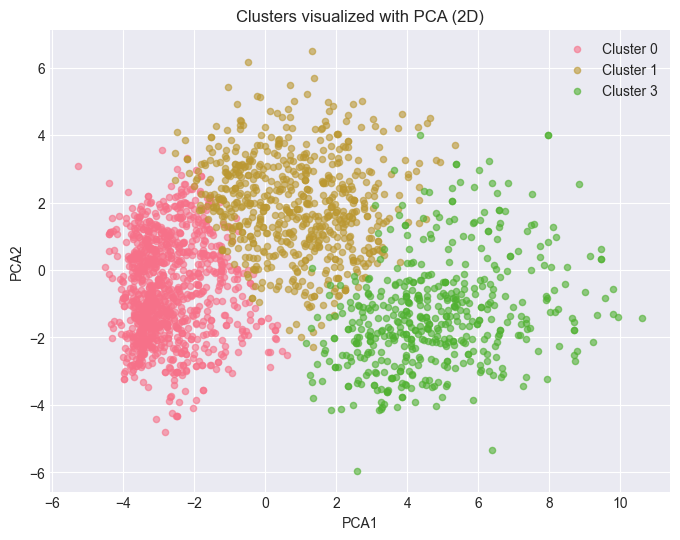

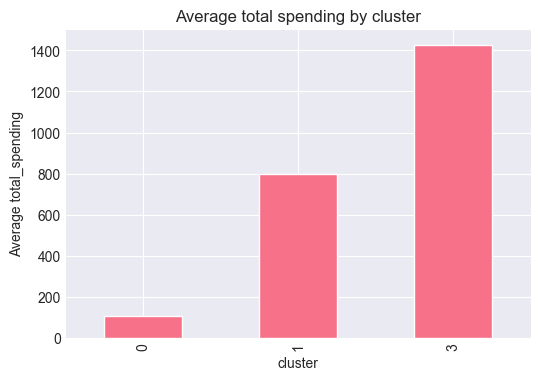

In [147]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 2D Representation of clusters
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(df_modeled_scaled)

plt.figure(figsize=(8,6))
for cl in sorted(df_final['cluster'].unique()):
    mask = df_final['cluster'] == cl
    plt.scatter(X_pca[mask,0], X_pca[mask,1], label=f'Cluster {cl}', alpha=0.6, s=20)
plt.xlabel('PCA1'); plt.ylabel('PCA2'); plt.title('Clusters visualized with PCA (2D)')
plt.legend(); plt.grid(True)
plt.show()

# Bar chart representation
plt.figure(figsize=(6,4))
df_final.groupby('cluster')['total_spend'].mean().plot(kind='bar')
plt.ylabel('Average total_spending'); plt.title('Average total spending by cluster')
plt.show()

### Clusters seem to be divided by income and spend. Purely economical distribution

In [148]:
# Create mapping dictionary
cluster_names = {
    0: 'Budget-Conscious Families',
    1: 'Middle-Income Shoppers', 
    3: 'Premium High Spenders'
}

# Add text labels as a NEW column (keep numeric 'cluster' for modeling)
df_final['cluster_name'] = df_final['cluster'].map(cluster_names)

# Verify
print("Cluster distribution:")
print(df_final[['cluster', 'cluster_name']].value_counts().sort_index())
print("\nFirst few rows:")
print(df_final[['cluster', 'cluster_name']].head())

Cluster distribution:
cluster  cluster_name             
0        Budget-Conscious Families    1074
1        Middle-Income Shoppers        667
3        Premium High Spenders         499
Name: count, dtype: int64

First few rows:
   cluster               cluster_name
0        3      Premium High Spenders
1        0  Budget-Conscious Families
2        1     Middle-Income Shoppers
3        0  Budget-Conscious Families
4        0  Budget-Conscious Families


## Classification

### TrainTest Split

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, classification_report, confusion_matrix)

# Prepare X and y
X = df_modeled_scaled.values
y = df_final['cluster'].values

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())

Training set: 1792 samples
Test set: 448 samples

Class distribution in training set:
0    859
1    534
3    399
Name: count, dtype: int64


### 1- Logistic Regression

LOGISTIC REGRESSION RESULTS
Accuracy: 0.9777
F1-Score: 0.9776

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       215
           1       0.98      0.95      0.96       133
           3       0.96      0.98      0.97       100

    accuracy                           0.98       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.98      0.98      0.98       448



C:\Users\Esraa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


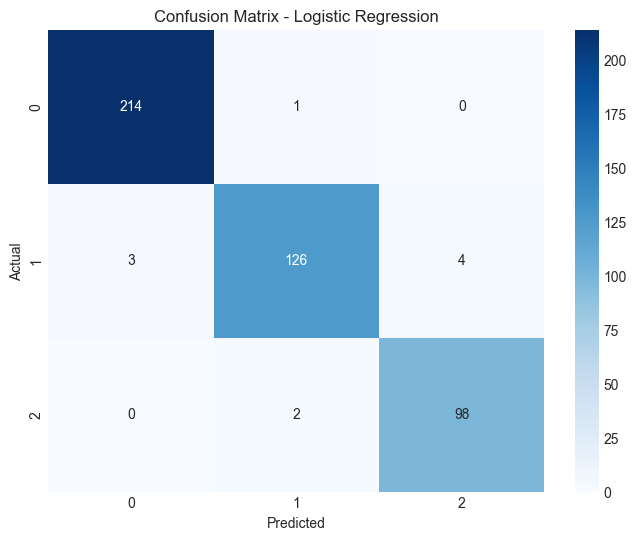

In [150]:
lr_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("="*60)
print("LOGISTIC REGRESSION RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 2- Decision Tree

DECISION TREE RESULTS
Accuracy: 0.9219
F1-Score: 0.9206

               precision    recall  f1-score   support

           0       0.93      0.99      0.96       215
           1       0.91      0.83      0.87       133
           3       0.92      0.89      0.90       100

    accuracy                           0.92       448
   macro avg       0.92      0.91      0.91       448
weighted avg       0.92      0.92      0.92       448



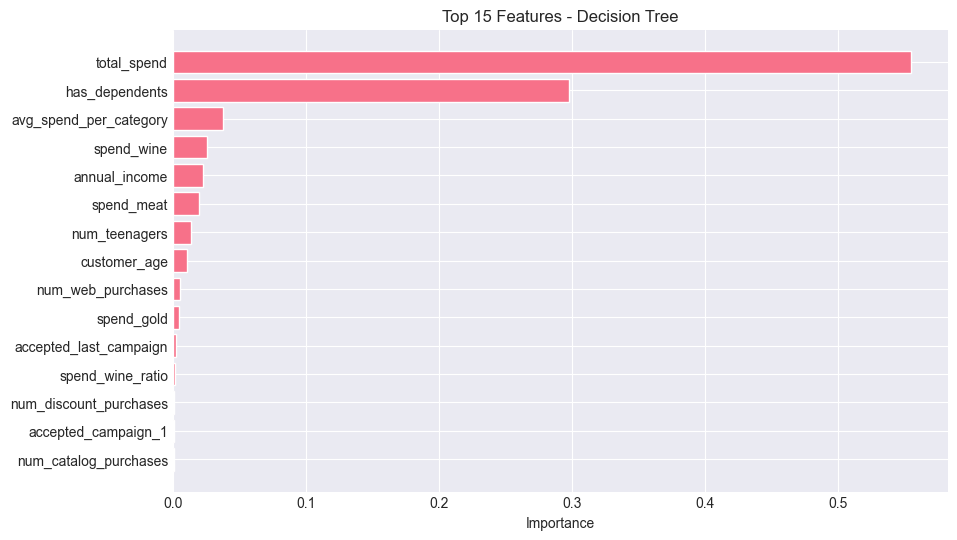

In [151]:
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=20, 
                                  min_samples_leaf=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("="*60)
print("DECISION TREE RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='weighted'):.4f}")
print("\n", classification_report(y_test, y_pred_dt))

# Feature Importance
feat_imp_dt = pd.DataFrame({
    'feature': numeric_cols,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_dt['feature'], feat_imp_dt['importance'])
plt.xlabel('Importance')
plt.title('Top 15 Features - Decision Tree')
plt.gca().invert_yaxis()
plt.show()

### 3- Random Forest

RANDOM FOREST RESULTS
Accuracy: 0.9621
F1-Score: 0.9619

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       215
           1       0.95      0.92      0.94       133
           3       0.97      0.96      0.96       100

    accuracy                           0.96       448
   macro avg       0.96      0.96      0.96       448
weighted avg       0.96      0.96      0.96       448



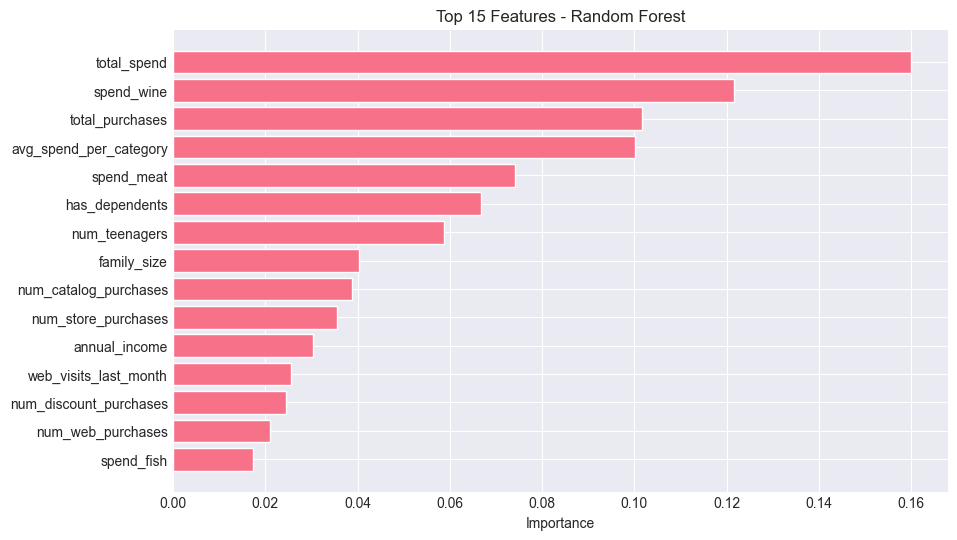

In [152]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15,
                                 min_samples_split=20, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("="*60)
print("RANDOM FOREST RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print("\n", classification_report(y_test, y_pred_rf))

# Feature Importance
feat_imp_rf = pd.DataFrame({
    'feature': numeric_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf['feature'], feat_imp_rf['importance'])
plt.xlabel('Importance')
plt.title('Top 15 Features - Random Forest')
plt.gca().invert_yaxis()
plt.show()

### Model Comparision

In [153]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted')
    ]
})

print("\n"+"="*80)
print("MODEL COMPARISON")
print("="*80)
print(results_df.to_string(index=False))
print(f"\nBest Model: {results_df.loc[results_df['Accuracy'].idxmax(), 'Model']}")


MODEL COMPARISON
              Model  Accuracy  F1-Score
Logistic Regression  0.977679  0.977595
      Decision Tree  0.921875  0.920597
      Random Forest  0.962054  0.961901

Best Model: Logistic Regression


### Some Cluster Insights

In [154]:
print("="*80)
print("CUSTOMER SEGMENT PROFILES & RECOMMENDATIONS")
print("="*80)

for cid, name in cluster_names.items():
    size = (df_final['cluster']==cid).sum()
    print(f"\n{'CLUSTER ' + str(cid)}: {name}")
    print(f"Size: {size} customers ({size/len(df_final)*100:.1f}%)")
    print(f"Avg Income: ${centers_df.loc[cid, 'annual_income']:.0f}")
    print(f"Avg Spend: ${centers_df.loc[cid, 'total_spend']:.0f}")

CUSTOMER SEGMENT PROFILES & RECOMMENDATIONS

CLUSTER 0: Budget-Conscious Families
Size: 1074 customers (47.9%)
Avg Income: $35768
Avg Spend: $105

CLUSTER 1: Middle-Income Shoppers
Size: 667 customers (29.8%)
Avg Income: $59473
Avg Spend: $797

CLUSTER 3: Premium High Spenders
Size: 499 customers (22.3%)
Avg Income: $76340
Avg Spend: $1430


## Preparing for Deployment

In [155]:
# ============================================
# EXPORT MODELS FOR STREAMLIT APP (FINAL FIX)
# ============================================

import joblib
import json
import os
import numpy as np

# Create directories
os.makedirs('models', exist_ok=True)
os.makedirs('data', exist_ok=True)

print("📦 Exporting models...")

# 1. Save the Logistic Regression model
joblib.dump(lr_model, 'models/logistic_model.pkl')
print("✓ Saved logistic_model.pkl")

# 2. Save the scaler
joblib.dump(scaler, 'models/scaler.pkl')
print("✓ Saved scaler.pkl")

# 3. Get actual cluster classes from the model
model_classes = lr_model.classes_
print(f"   Model predicts classes: {model_classes}")
print(f"   Number of classes: {len(model_classes)}")

# 4. Create cluster name mapping
# Map from model's predicted class index to actual cluster ID
cluster_names_dict = {}
class_to_cluster_map = {}  # NEW: Map prediction index to cluster ID

for idx, cluster_id in enumerate(model_classes):
    class_to_cluster_map[idx] = int(cluster_id)
    
    # Use existing cluster names if available
    if 'cluster_names' in globals() and cluster_id in cluster_names:
        cluster_names_dict[int(cluster_id)] = cluster_names[cluster_id]
    else:
        cluster_names_dict[int(cluster_id)] = f"Cluster {cluster_id}"

print(f"   Cluster names: {cluster_names_dict}")
print(f"   Class mapping: {class_to_cluster_map}")

# 5. Save feature info with mapping
feature_info = {
    'numeric_cols': numeric_cols,
    'cluster_names': cluster_names_dict,
    'n_clusters': len(model_classes),
    'model_classes': model_classes.tolist(),  # NEW: Actual cluster IDs
    'class_to_cluster': class_to_cluster_map  # NEW: Index to cluster ID mapping
}

joblib.dump(feature_info, 'models/feature_names.pkl')
print("✓ Saved feature_names.pkl")

# 6. Save cluster statistics
cluster_stats = {}
for cluster_id in model_classes:
    cluster_data = df_final[df_final['cluster'] == cluster_id]
    
    cluster_name = cluster_names_dict.get(int(cluster_id), f"Cluster {cluster_id}")
    
    cluster_stats[str(int(cluster_id))] = {
        'name': cluster_name,
        'size': int(len(cluster_data)),
        'avg_income': float(cluster_data['annual_income'].mean()) if len(cluster_data) > 0 else 0.0,
        'avg_spend': float(cluster_data['total_spend'].mean()) if len(cluster_data) > 0 else 0.0
    }

with open('data/cluster_info.json', 'w') as f:
    json.dump(cluster_stats, f, indent=2)
print("✓ Saved cluster_info.json")

print("\n✅ All models exported successfully!")
print(f"\n📊 Summary:")
print(f"   - Model classes: {model_classes.tolist()}")
print(f"   - Number of clusters: {len(model_classes)}")
print(f"   - Feature columns: {len(numeric_cols)}")
print(f"   - Cluster names: {list(cluster_names_dict.values())}")

📦 Exporting models...
✓ Saved logistic_model.pkl
✓ Saved scaler.pkl
   Model predicts classes: [0 1 3]
   Number of classes: 3
   Cluster names: {0: 'Budget-Conscious Families', 1: 'Middle-Income Shoppers', 3: 'Premium High Spenders'}
   Class mapping: {0: 0, 1: 1, 2: 3}
✓ Saved feature_names.pkl
✓ Saved cluster_info.json

✅ All models exported successfully!

📊 Summary:
   - Model classes: [0, 1, 3]
   - Number of clusters: 3
   - Feature columns: 43
   - Cluster names: ['Budget-Conscious Families', 'Middle-Income Shoppers', 'Premium High Spenders']
